# 📊 Telecom X – Predicción de Cancelación (Churn)
---

🗂️ 1. Preparación de los datos

In [91]:
# =========================
# 1-1: Extracción de datos
# =========================

import pandas as pd

# Importa dataset
url = "https://raw.githubusercontent.com/adsecv/ctx_aec_2/refs/heads/main/base-de-datos/tabla_normalizada.csv"

# Carga dataset
df = pd.read_csv(url)

# Vista general de los datos
print("Dimensiones del dataset:", df.shape)
df.head()


Dimensiones del dataset: (7043, 22)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [92]:
# ==========================================
# 1-2: Eliminación de columnas irrelevantes
# ==========================================

# Copia el dataset evitando alterar el original
df_clean = df.copy()

# Elimina el identificador único de cliente
df_clean.drop(columns="customerID", inplace=True, errors='ignore')

df_clean.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [93]:
# ==========================
# Revisión de valores nulos
# ==========================

# Conteo de valores nulos por columna
print("Valores nulos por columna:\n")
print(df_clean.isnull().sum())

Valores nulos por columna:

Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
Cuentas_Diarias               0
dtype: int64


In [94]:
# ============================
# Imputación de valores nulos
# ============================

# Rellena nulos de account.Charges.Total con 0
df_clean["account.Charges.Total"] = df_clean["account.Charges.Total"].fillna(0)

# Verificación
print("Valores nulos tras imputación:\n")
print(df_clean.isnull().sum())

Valores nulos tras imputación:

Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
Cuentas_Diarias              0
dtype: int64


In [95]:
# ===============
#  1-3: Encoding
# ===============

# Copia el dataset
df_encoded = df_clean.copy()

# Convierte columna objetivo 'Churn' a binaria
df_encoded["Churn"] = df_encoded["Churn"].map({"Yes": 1, "No": 0})

# Identifica columnas categóricas (excluyendo 'Churn')
categorical_cols = df_encoded.select_dtypes(include=["object"]).columns.tolist()

print("Columnas categóricas a codificar:", categorical_cols)

# Aplica One-Hot Encoding manteniendo categorías como "No phone service" o "No internet service"
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

print("Encoding completado")
print("Dimensiones después del encoding:", df_encoded.shape)
df_encoded.head()

Columnas categóricas a codificar: ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']
Encoding completado
Dimensiones después del encoding: (7043, 32)


,Churn,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,9,65.6,593.30,2.186667,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,0,9,59.9,542.40,1.996667,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.9,280.85,2.463333,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,1,13,98.0,1237.85,3.266667,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,1,3,83.9,267.40,2.796667,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


Distribución de Churn:
Churn  count   pct
   No   5174 73.46
  Yes   1869 26.54

Minoría = 26.54%  ->  Desbalance SÍ (umbral 30%)


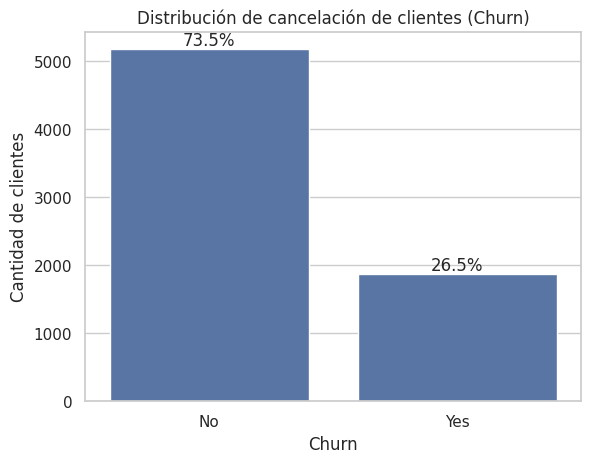

In [96]:
# ==========================================================
# 1-4: Verificación de la proporción de cancelación (Churn)
# ==========================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Usa la columna binaria de df_encoded y la mapea a etiquetas legibles
label_map = {0: "No", 1: "Yes"}
y = df_encoded["Churn"].map(label_map)

# Resumen de distribución (conteos y porcentajes) en orden consistente
order = ["No", "Yes"]
counts = y.value_counts().reindex(order, fill_value=0)
pct = y.value_counts(normalize=True).reindex(order, fill_value=0).mul(100).round(2)

summary = pd.DataFrame({"Churn": order, "count": counts.values, "pct": pct.values})
print("Distribución de Churn:")
print(summary.to_string(index=False))

# Regla simple para marcar desbalance (minoría < 30%)
minority_pct = pct.min()
is_imbalanced = minority_pct < 30
print(f"\nMinoría = {minority_pct:.2f}%  ->  Desbalance {'SÍ' if is_imbalanced else 'NO'} (umbral 30%)")

# Visualización
sns.countplot(x=y, order=order)
plt.title("Distribución de cancelación de clientes (Churn)")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")

# Etiquetas con porcentaje encima de cada barra
for i, v in enumerate(counts.values):
    plt.text(i, v, f"{pct.values[i]:.1f}%", ha="center", va="bottom")

plt.show()

In [97]:
# ========================
# 1-5: Balanceo de Clases
# ========================

from imblearn.over_sampling import SMOTE
from collections import Counter

# Variables predictoras (X) y target (y)
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# 1) Baseline: sin balanceo
print("Distribución original:", Counter(y))

# 2) Con SMOTE (oversampling de la clase minoritaria)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Distribución con SMOTE:", Counter(y_smote))

# Ahora tenemos 2 versiones de los datos:
# - X, y  (sin balanceo, baseline)
# - X_smote, y_smote (balanceado con SMOTE)

Distribución original: Counter({0: 5174, 1: 1869})
Distribución con SMOTE: Counter({0: 5174, 1: 5174})


### Aunque se generó la versión balanceada, finalmente se decidió seguir con los datos originales para garantizar que las conclusiones reflejen la distribución real de clientes. El uso de SMOTE quedó como un paso exploratorio, útil para probar en caso de que se buscara mejorar específicamente el recall de la clase minoritaria (Churn) en entrenamientos futuros.

In [98]:
# =====================================
# 1-6: Normalización / Estandarización
# =====================================

from sklearn.preprocessing import StandardScaler

# Variables numéricas a escalar
num_cols = ["customer.tenure", "account.Charges.Monthly", "account.Charges.Total", "Cuentas_Diarias"]

# Copia el dataset original codificado
df_no_scaled = df_encoded.copy()

# Crea el dataset normalizado (solo numéricas)
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

print("Dataset sin normalizar y dataset normalizado preparados.")
print("df_no_scaled (para modelos de árboles).")
print("df_scaled (para modelos sensibles a la escala).")

Dataset sin normalizar y dataset normalizado preparados.
df_no_scaled (para modelos de árboles).
df_scaled (para modelos sensibles a la escala).


---

🔍 2. Correlación y selección de variables

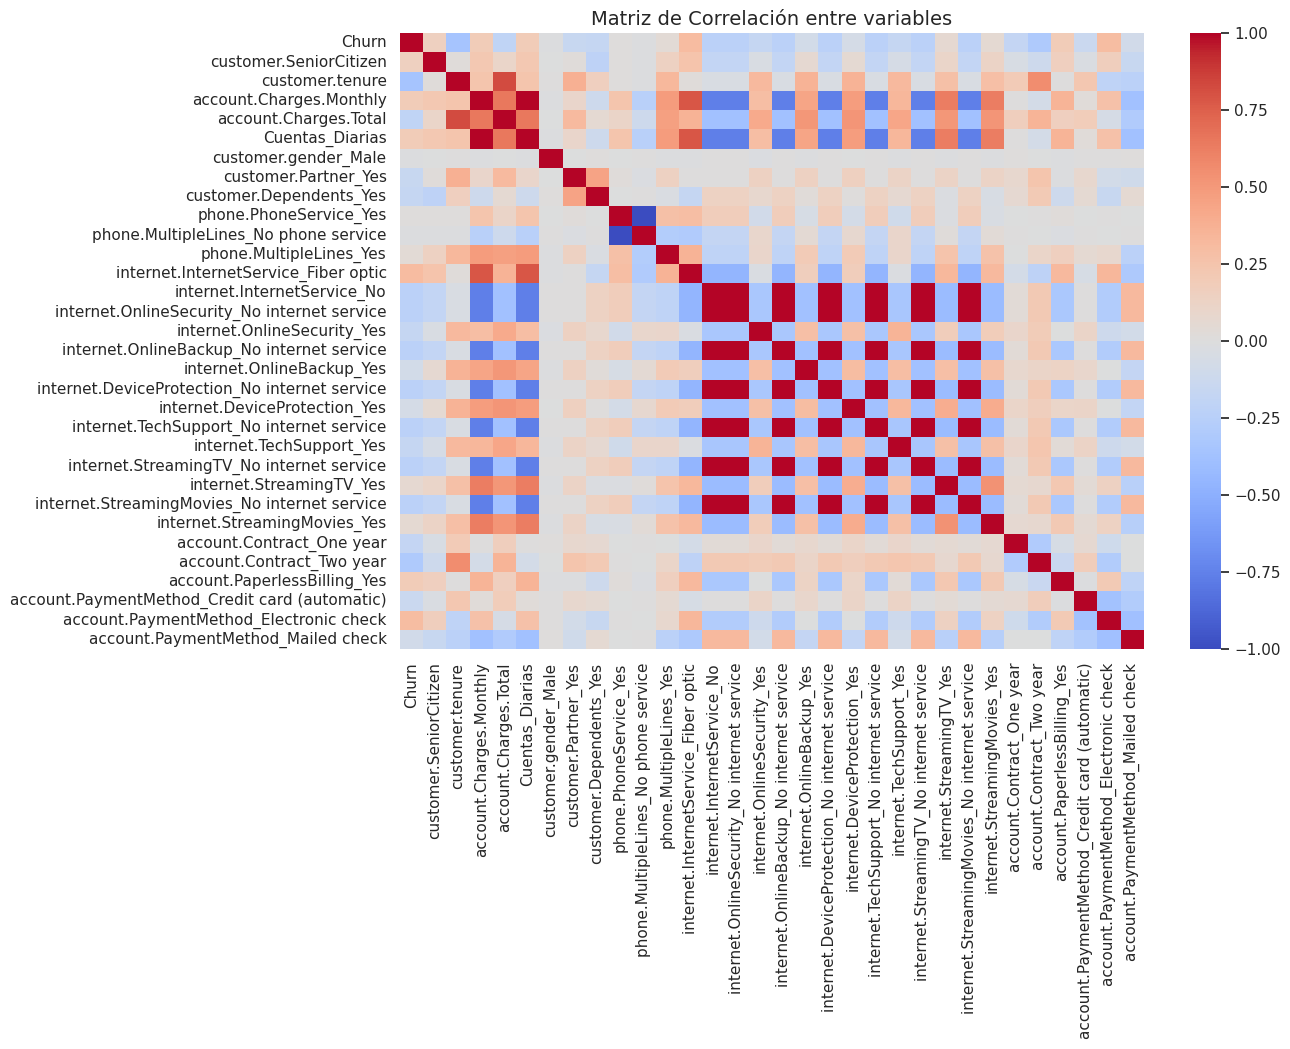

📌 Correlación de las variables con la cancelación (Churn):
Churn                                            1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
Cuentas_Diarias                                  0.193356
account.Charges.Monthly                          0.193356
account.PaperlessBilling_Yes                     0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_Yes                         0.063228
internet.StreamingMovies_Yes                     0.061382
phone.MultipleLines_Yes                          0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_Yes                   -0.066160
internet.OnlineBackup_Yes                       -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.Payme

In [99]:
# =============================
# 2-1: Análisis de correlación
# =============================

# Usa el dataset normalizado (df_scaled) para facilitar la comparación
corr_matrix = df_scaled.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False, fmt=".2f")
plt.title("Matriz de Correlación entre variables", fontsize=14)
plt.show()

# Revisar correlación con la variable objetivo 'Churn'
# Como 'Churn' está codificada (0 = No, 1 = Yes), podemos revisar directamente
churn_corr = corr_matrix["Churn"].sort_values(ascending=False)
print("📌 Correlación de las variables con la cancelación (Churn):")
print(churn_corr)

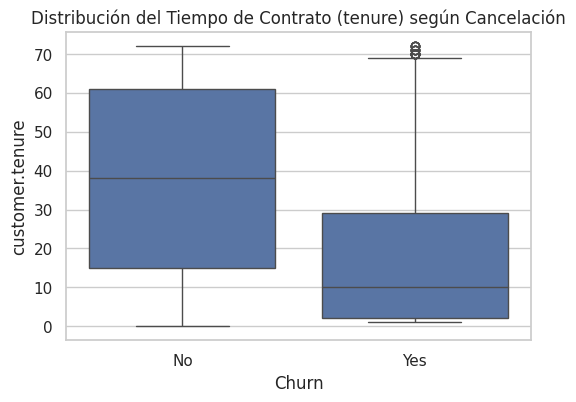

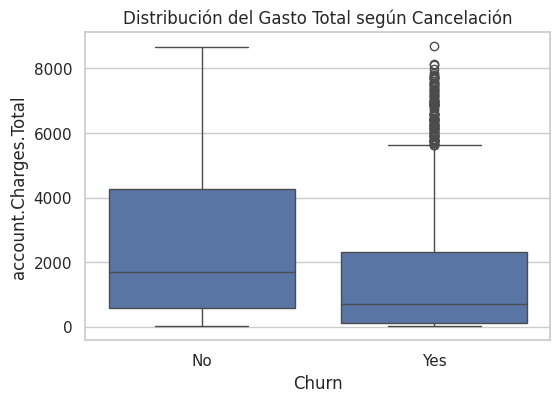

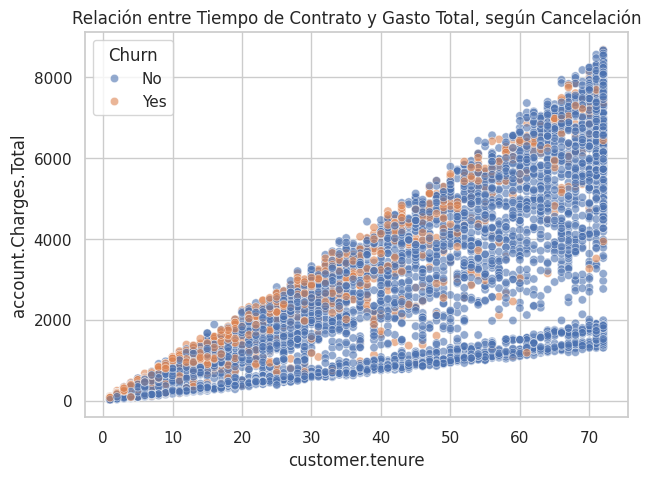

Promedios por Churn:
       customer.tenure  account.Charges.Total
Churn                                        
No           37.569965            2555.344141
Yes          17.979133            1531.796094


In [100]:
# =======================
# 2-2: Análisis dirigido
# =======================

# Configuración estética
sns.set(style="whitegrid")

# 1. Boxplot: Tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="customer.tenure", data=df)
plt.title("Distribución del Tiempo de Contrato (tenure) según Cancelación")
plt.show()

# 2. Boxplot: Total Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="account.Charges.Total", data=df)
plt.title("Distribución del Gasto Total según Cancelación")
plt.show()

# 3. Scatterplot: Tenure vs Total Charges, coloreado por Churn
plt.figure(figsize=(7,5))
sns.scatterplot(x="customer.tenure", y="account.Charges.Total", hue="Churn", data=df, alpha=0.6)
plt.title("Relación entre Tiempo de Contrato y Gasto Total, según Cancelación")
plt.show()

# 4. Medias por grupo
print("Promedios por Churn:")
print(df.groupby("Churn")[["customer.tenure","account.Charges.Total"]].mean())

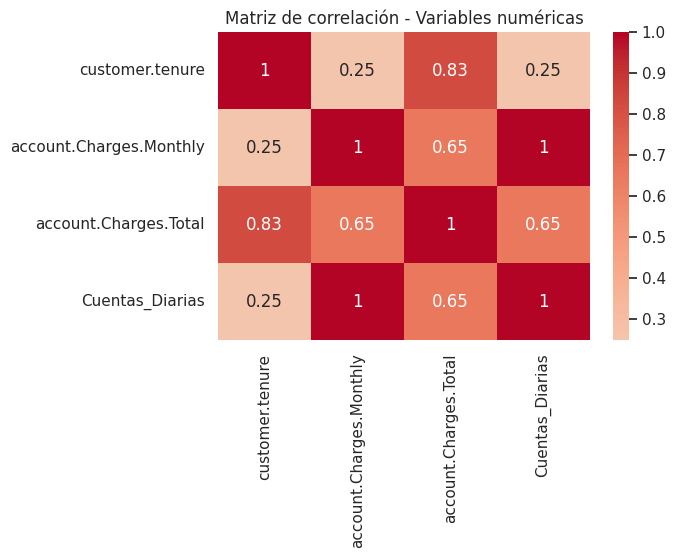

In [101]:
# =======================================
# 2-3: Selección de variables candidatas
# =======================================

# Revisa correlaciones solo entre categorias numéricas
numeric_vars = ['customer.tenure',
                'account.Charges.Monthly',
                'account.Charges.Total',
                'Cuentas_Diarias']

plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_vars].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación - Variables numéricas")
plt.show()

Columnas eliminadas: ['account.Charges.Total', 'Cuentas_Diarias']
Shape final del dataset: (7043, 30)


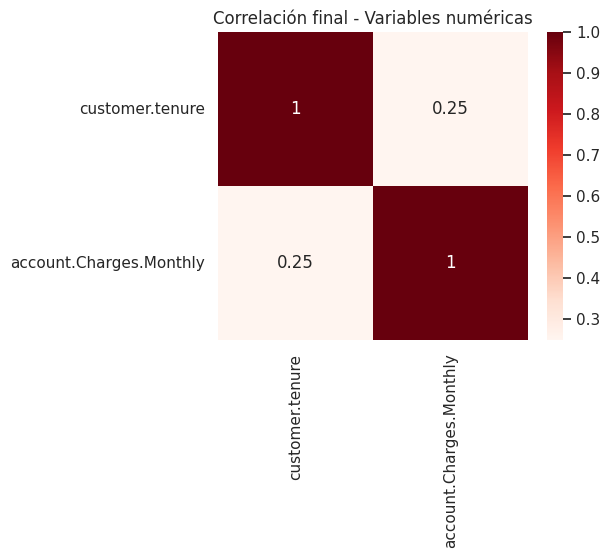

In [102]:
# ====================================
# 2-3: Reducción de multicolinealidad
# ====================================

# Copia el DataFrame para no alterar el original (opcional)
df_reducido = df_encoded.copy()

# Elimina variables redundantes:
cols_to_drop = ['account.Charges.Total', 'Cuentas_Diarias']
# Razones
# Account.Charges.Total -> altamente correlacionada con tenure y MonthlyCharges
# Cuentas_Diarias -> duplicada de MonthlyCharges

df_reducido = df_reducido.drop(columns=cols_to_drop)

print("Columnas eliminadas:", cols_to_drop)
print("Shape final del dataset:", df_reducido.shape)

# Verifica de nuevo correlaciones numéricas
corr_matrix = df_reducido[['customer.tenure','account.Charges.Monthly']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.title("Correlación final - Variables numéricas")
plt.show()

In [108]:
# ============================================
# 2-3: Selección final de variables numéricas
# ============================================

# Elimina variables redundantes o altamente correlacionadas
df_final = df_encoded.drop(columns=['account.Charges.Total', 'Cuentas_Diarias'])

# Verifica las columnas que quedan
print("Dataset base fijado para uso mas adelante:")
print(df_final.columns)

Dataset base fijado para uso mas adelante:
Index(['Churn', 'customer.SeniorCitizen', 'customer.tenure',
       'account.Charges.Monthly', 'customer.gender_Male',
       'customer.Partner_Yes', 'customer.Dependents_Yes',
       'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic',
       'internet.InternetService_No',
       'internet.OnlineSecurity_No internet service',
       'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_No internet service',
       'internet.OnlineBackup_Yes',
       'internet.DeviceProtection_No internet service',
       'internet.DeviceProtection_Yes',
       'internet.TechSupport_No internet service', 'internet.TechSupport_Yes',
       'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_No internet service',
       'internet.StreamingMovies_Yes', 'account.Contract_One year',
       'account.Contract_Two year', 'a

---

🤖 3. Modelado predictivo

In [109]:
# =========================================
# 3-1: Separación de datos en train y test
# =========================================

from sklearn.model_selection import train_test_split

# Define X (características) y y (variable objetivo)
X = df_final.drop(columns=['Churn'])
y = df_final['Churn']

# Divide en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirma tamaños de los conjuntos
print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)
print("Proporción de churn en train:", y_train.mean())
print("Proporción de churn en test:", y_test.mean())

Tamaño de entrenamiento: (5634, 29)
Tamaño de prueba: (1409, 29)
Proporción de churn en train: 0.2653532126375577
Proporción de churn en test: 0.2654364797728886


In [105]:
# =========================
# 3-2: Creación de Modelos
# =========================

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# -------------------------------------------------------
# Modelo 1: Regresión Logística (requiere normalización)
# -------------------------------------------------------
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),  # Normalización
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenamiento
pipeline_logreg.fit(X_train, y_train)

# ----------------------------------------------------
# Modelo 2: Random Forest (no requiere normalización)
# ----------------------------------------------------
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Entrenamiento
rf_model.fit(X_train, y_train)

print("Modelos entrenados con éxito")

✅ Modelos entrenados con éxito


In [111]:
# ===========================
# 3-3: Evaluación de Modelos
# ===========================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# ----------------------------
# Predicciones
# ----------------------------
y_pred_logreg = pipeline_logreg.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# ----------------------------
# Función auxiliar para evaluar
# ----------------------------
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\nResultados para {nombre}:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("\nMatriz de confusión:")
    print(confusion_matrix(y_true, y_pred))

# ----------------------------
# Evalua ambos modelos
# ----------------------------
evaluar_modelo("Regresión Logística", y_test, y_pred_logreg)
evaluar_modelo("Random Forest", y_test, y_pred_rf)

# ----------------------------
# Comparación en tabla
# ----------------------------
resultados = pd.DataFrame({
    "Modelo": ["Regresión Logística", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logreg),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_logreg),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_logreg),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_logreg),
        f1_score(y_test, y_pred_rf)
    ]
})

print("\nComparación de métricas:")
print(resultados)


Resultados para Regresión Logística:
Accuracy : 0.7984386089425124
Precision: 0.6470588235294118
Recall   : 0.5294117647058824
F1-score : 0.5823529411764706

Matriz de confusión:
[[927 108]
 [176 198]]

Resultados para Random Forest:
Accuracy : 0.7835344215755855
Precision: 0.6210526315789474
Recall   : 0.4732620320855615
F1-score : 0.5371775417298937

Matriz de confusión:
[[927 108]
 [197 177]]

Comparación de métricas:
                Modelo  Accuracy  Precision    Recall  F1-score
0  Regresión Logística  0.798439   0.647059  0.529412  0.582353
1        Random Forest  0.783534   0.621053  0.473262  0.537178


---

🧠 4. Interpretación y conclusiones

In [112]:
# ==============================
# 4-1: Importancia de Variables
# ==============================

import numpy as np

# ----------------------------------
# Importancia - Regresión Logística
# ----------------------------------
coef = pipeline_logreg.named_steps['logreg'].coef_[0]
features = X_train.columns

logistic_importance = pd.DataFrame({
    'Feature': features,
    'Coef': coef,
    'Impacto': np.where(coef > 0, '↑ Mayor prob. Churn', '↓ Menor prob. Churn'),
    'Abs_Coef': np.abs(coef)
}).sort_values(by='Abs_Coef', ascending=False)

print("Importancia de variables - Regresión Logística (Top 10)")
print(logistic_importance[['Feature','Coef','Impacto']].head(10))


# ----------------------------
# Importancia - Random Forest
# ----------------------------
rf_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportancia de variables - Random Forest (Top 10)")
print(rf_importance.head(10))

Importancia de variables - Regresión Logística (Top 10)
                                   Feature      Coef              Impacto
1                          customer.tenure -0.828584  ↓ Menor prob. Churn
9     internet.InternetService_Fiber optic  0.577138  ↑ Mayor prob. Churn
24               account.Contract_Two year -0.573444  ↓ Menor prob. Churn
2                  account.Charges.Monthly -0.359802  ↓ Menor prob. Churn
23               account.Contract_One year -0.282015  ↓ Menor prob. Churn
20                internet.StreamingTV_Yes  0.204804  ↑ Mayor prob. Churn
8                  phone.MultipleLines_Yes  0.204069  ↑ Mayor prob. Churn
27  account.PaymentMethod_Electronic check  0.193514  ↑ Mayor prob. Churn
25            account.PaperlessBilling_Yes  0.176260  ↑ Mayor prob. Churn
22            internet.StreamingMovies_Yes  0.153976  ↑ Mayor prob. Churn

Importancia de variables - Random Forest (Top 10)
                                   Feature  Importance
1                       

# 🔎 Análisis de importancia de variables  

Los modelos coinciden en que las variables más influyentes son:  

1. **Antigüedad (`tenure`)**: cuanto mayor es el tiempo de permanencia, menor es la probabilidad de cancelación.  
2. **Cargos mensuales (`MonthlyCharges`)**: clientes con facturas altas y poca permanencia tienden a cancelar.  
3. **Tipo de contrato**: los contratos de 1 o 2 años reducen el riesgo de churn.  
4. **Internet fibra óptica**: se asocia a mayor cancelación, posiblemente por expectativas de servicio no cumplidas.  
5. **Método de pago electrónico y facturación digital**: muestran ligera asociación con mayor churn, indicando menor vínculo con la empresa.  

📌 **Conclusión**:  
La retención debería enfocarse en clientes nuevos con cargos altos, promover contratos de largo plazo y mejorar la experiencia de usuarios de fibra y pagos electrónicos.  


# =============================
# 4-2: Conclusiones Estratégicas
# =============================

### 📊 Síntesis de Resultados de Modelos

- **Regresión Logística**  
  - Accuracy: **0.798**  
  - Recall: **0.529**  
  - F1-score: **0.582**  
  - Ofrece mejor equilibrio entre métricas, siendo más confiable para detectar clientes en riesgo de churn.  

- **Random Forest**  
  - Accuracy: **0.784**  
  - Recall: **0.473**  
  - F1-score: **0.537**  
  - Aunque útil, presentó menor recall, lo que implica mayor dificultad para identificar correctamente a los clientes que efectivamente cancelan.  

👉 En este caso, la **Regresión Logística** resulta el modelo más adecuado por su mayor capacidad de generalización y porque facilita la interpretación de las variables.

---

### 🔎 Factores Clave Detectados

1. **Antigüedad (Tenure)**: es el predictor más importante. Los clientes con más tiempo muestran clara **menor propensión al churn**.  
2. **Cargos Mensuales (MonthlyCharges)**: a mayor gasto mensual, especialmente en clientes con poca antigüedad, mayor es la probabilidad de cancelación.  
3. **Tipo de Contrato**: contratos de **1 y 2 años** reducen el riesgo de churn en comparación con los contratos mensuales, que incrementan la probabilidad de abandono.  
4. **Internet de Fibra Óptica**: se asocia con **mayor churn**, posiblemente porque las expectativas de este servicio son más altas y cualquier problema genera insatisfacción rápida.  
5. **Método de Pago y Facturación Digital**: clientes con **pago electrónico y facturación sin papel** muestran más propensión a cancelar, lo cual puede relacionarse con una experiencia más “impersonal”.  
6. **Servicios Complementarios (Streaming, Soporte Técnico)**: aunque secundarios, contribuyen al perfil de clientes que permanecen o cancelan, al afectar la percepción de valor total del servicio.  

---

### 🧩 Interpretación Estratégica

1. **Fidelización de clientes nuevos**  
   - Los clientes con **baja antigüedad y cargos altos** son el grupo más vulnerable.  
   - Estrategia: programas de bienvenida, descuentos progresivos o promociones especiales en los primeros meses.  

2. **Promoción de contratos a largo plazo**  
   - Los contratos de 1 o 2 años reducen significativamente el churn.  
   - Estrategia: incentivar este tipo de contrato con tarifas preferenciales, beneficios acumulativos o servicios premium incluidos.  

3. **Mejorar la experiencia de usuarios de fibra óptica**  
   - Dado que este grupo tiene alta probabilidad de cancelar, se recomienda reforzar la **calidad del servicio técnico, soporte y comunicación proactiva** para prevenir la insatisfacción.  

4. **Atención personalizada a clientes con pagos digitales**  
   - Clientes con pago electrónico o facturación sin papel parecen tener **menor vínculo con la empresa**.  
   - Estrategia: establecer canales de comunicación más cercanos (mensajes personalizados, encuestas de satisfacción, recompensas digitales).  

5. **Servicios complementarios como palanca de valor**  
   - Ofrecer paquetes integrados (internet + streaming + soporte premium) puede reforzar la percepción de valor y reducir la probabilidad de abandono.  

---

### ✅ Conclusión Final

El análisis confirma que la cancelación de clientes en Telecom X está influenciada principalmente por la **antigüedad, los cargos mensuales, el tipo de contrato y la modalidad de internet y pago**.  
El modelo de **Regresión Logística** se posiciona como el más confiable en este caso, gracias a su buen rendimiento y capacidad de interpretación.  

Las **estrategias de retención** deben enfocarse en:  
- **Clientes nuevos con cargos altos** → planes flexibles y beneficios iniciales.  
- **Impulso de contratos largos** → reducción del churn estructural.  
- **Mejor experiencia en fibra óptica** → reducir la percepción de incumplimiento de expectativas.  
- **Atención personalizada a clientes digitales** → mantener el vínculo y reforzar la fidelidad.  

En conjunto, estas acciones permitirían a la compañía **disminuir la tasa de churn y mejorar la lealtad de los clientes en el mediano plazo**.
